# 1. Geometric modeling (Solution)

The __geometric model__ of a robot is a set of equations describing the robot's geometry. This enables for instance to calculate the end-effector's position in the workspace based on the joint angles. There are 2 kinds of geometric models:

- __Direct Geometric Model (DGM)__ : given joint positions, it gives the position of the end-effector (tool, hand, foot, etc.) with respect to the robot's base 

- __Inverse Geometric Model (IGM)__ : given an end-effector position (and orientation), it gives the joint positions 

The joint positions are usually denoted by $q$ and belong to __joint space__. The end-effector's pose is denoted $p$ and belongs to the __task space__, or cartesian space. The geometric model is in fact a mapping between the joint space and the task space. We will introduce these concepts more concretely with examples. 

__Note__: This Notebook contains trigonometry formulas. Take a look at this [cheatsheet](https://tutorial.math.lamar.edu/pdf/trig_cheat_sheet_reduced.pdf) if you feel lost.

# 1R robot

Consider the simple robot arm consisting of 1 revolute joint and 1 link. 

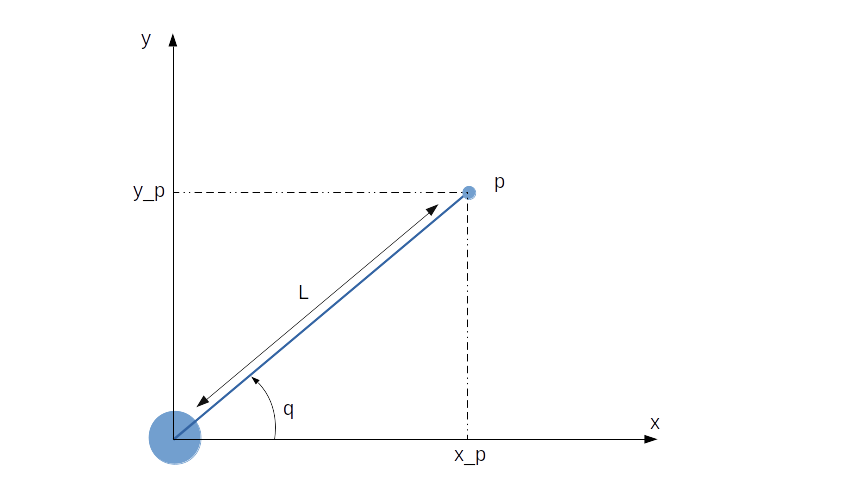

In [1]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
from IPython.display import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# Display the 1R robot
Image("1dof.png")

One way to describe the robot configuration is to use the joint angle $q\in[-\pi,\pi[$. Knowing $q$, the DGM enables to determine the end-effector's position $p=(x_p,y_p)$ with respect to a fixed reference coordinate frame attached to the base. In this case: the joint space is then the interval $[-\pi,\pi[$ and the task space is the cartesian plane $\mathbb{R}^2$. The DGM equations are

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

where $(x_p,y_p)$ are the cartesian coordinates of the end-effector and $L$ is the length of the link. The same equations can be expressed more compactly as 

$$
p = DGM(q)
$$

where $DGM$ is a function taking a joint angle $q$ as an input and outputs a cartesian position $p=(x_p,y_p)$ expressed in the base frame. It is implemented in python as follow

In [2]:
# Define the link length
L = 1.

# Function corresponding to the direct geometric model
def DGM(q):
    '''
    Input : joint angle (in rad)
    Output : end-effector position (in m)
    '''
    
    x_p = L*np.cos(q)
    y_p = L*np.sin(q)
    
    p = np.array([x_p, y_p])
    
    return p

# Test the DGM and display the result
q = 1.7
p = DGM(q)
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

The end-effector position corresponding to q = 1.7 is : p = [-0.12884449  0.99166481]


The IGM solves the converse problem: given an end-effector position (task space), it returns the corresponding position. The IGM is derived by inverting the DGM equations, i.e. by expressing $q$ in terms of $p$. Recall the DGM

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

Assuming $cos(q) \neq 0$ we can divide the second equation by the first equation

$$
\frac{y_p}{x_p} = \frac{\sin(q)}{\cos(q)} = \tan(q)\\
$$

Therefore the IGM reads

$$
q = \tan^{-1}(\frac{y_p}{x_p})
$$

The following function implements the IGM

In [3]:
# Function corresponding to the inverse geometric model
def IGM(p):
    '''
    Input : end-effector position (in m)
    Output : joint angle (in rad)
    '''
    
    x_p = p[0]
    y_p = p[1]
    
    q = np.arctan2(y_p, x_p) % (2*np.pi)
    
    return q

# Test the DGM and display the result
p = np.array([0.3, 0.5])
q = IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The joint position corresponding to p = [0.3 0.5] is : q = 1.0303768265243125


__Question__ : For which value(s) $q$ do we have $\cos(q) = 0$ ? In this case, can we still use the IGM we derived previously in order to calculate $q$ ? 

__Answer__ : When $q=\pi/2$ or $3\pi/2$. In that case, one cannot the IGM derived above since $\tan^{-1}$ is not defined. But we can see that $x_p=0$ and $y_p = +1$ or $-1$.

Now we summarize the geometric model of the 1R robot into a python class

In [4]:
# Class for the geometric model of the 2R robot
class GeometricModel1R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L=1.):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DGM(self, q):
        '''
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = L*np.cos(q)
        y_p = L*np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p) % (2*np.pi)
        return q
    
    def animate(self, q):
        '''
        Simulate the robot using DGM 
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L -1, self.L + 1), ylim=(-self.L -1, self.L + 1))
        text_str = "One Dof Manipulator Animation"
        link, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link, base, endeff
        
        def animate(i):
            p = self.DGM(q[i])
            x = p[0] 
            y = p[1] 
            link.set_data([0,x], [0,y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[0], interval=50, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : assume that we are given a sequence of joint positions $q_1, ..., q_n$. We want to calculate the corresponding end-effector trajectory in the task space, namely $p_1, ..., p_n$. Using the `GeometricModel1R` class defined above, fill out the code below to generate this sequence of end-effector positions.

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA7cm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABdzZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAA33SOPPF3YZgYAPnkfalDBQvuDeYuR4gQQ
33H1JsIsldiZ1tRb1HLwuEexcKBYOl0dI0TzqGdiK70AABR3slWIsDbfLsv1oO4pARGXtakA9PU2
YzrOoWlUBTTddkU+k16fLg7/cH2IRMYIjhwpMLVVe9bIWgxA2+1J3xWQ/xZhfWMSjGouZobSgaF5
xDqaJRCVEngZ2Nmy0XwDSXBwLKu9zfFlTvIO3qGjMdI5JNjENMpNWxwFqgGx9A9lceCqNXZpNIRC
1IQzUTlrZYWQycQCHipOBvGtoHeyeztH+qiqYT8AmuzjehKagEDWMBDzzYRkchZD1xsYO9/+jmyb
HXHswqvaC73GGtJwqBFXTUUcUnWYsWNdkOkXEZLNoxTxP2k35p29gTDGQAMXuZe6ZQgD5vtMUu8z
Pfj/np2AqsemRtRtNOpGlrVYI+U/vLxGIYhtrbqyot6W81/szOZyVQUoA1uGmLT7Pqp3Z+ICBaeg
wAusMFT3Lb5zbJ+K3CSqLbOzDpvmDGuDbgIxs0xl91OlssQQhZN2H+IXmd0w31SLsRzZ1seEaDDC
cjMmsYuvGnA6Of8O8Obba+btpjVLUlHLqqirNtKiXBZyRkMTquJGFMqRKB196V/BP3D2EQSaX+k/
i0yzfrAhiZE5ut3cPB9k5dnds96AnqVVbyyZ6K+fS8P9XYz28WPR2W83Zgmy+NyGzWLprF9PwU19
6nrm6jy5blY0LN+HOWAPcDs0uvf+/pYurkBLIq2pAE0gHEKo2ZkBk0/ezBINZqddLyI44WLvoLf6
WuQIqenu+tYLgbwz6R8ugFIC21ZcrE4fLEHFhT67lW9mqzo47LI6o+qQMX2rE7Ox44Wm4PPsgHOw
YQ48C8Mk+aQzXPAB2JisxGl2y0/TvmRGe/hKTR4Z1Af98ZB6ZmaGsU1dRclETU/u8+a5UL5nfvcv
ACHzXDq2IRWtyCrN7u3ajWhurgONsW4RnhMf96OiDW8atdFv1D3XLi+ICcqraWwaPrBpWClWujmu
PWODYrxz9mOnugEtCvn//wzcvbAjax1+EJ4r0gpUB/32gaZZbvm2g+q2b/+isxHJZCTZoOvxWPwO
ZWRfHkqM5OUxwOWhtbJ+7uEI7MvJKymnq14xZGVTUPcLKWPsVoXFYFiUivm/G+WaaYzbvX+jR7MF
2fx7P1xGU0IVvKe1IAjdkBRU+srY/sPHe/ZeOv8N820EIEonny39GcGn/Gg65zfLS4K/wPmHCp+o
ww/AV6C2LkncY99OhCZCWb85Vk0F/upprWO27EQKB9VBy01K3f/t3/c5yagMf1JykqyU1vp/qw+u
33vgqUinqO58imYDHfErAWY5zGvLdCDm8c/UwXUmCkwp17HQkjtalp1PDpvAcP0I90o6w/IeNKaB
o2VvVE/csVyphmUF3UHStQ8DfkOws+3KQBFYnLUUt+yHp/PlcZda/VST6h7YObKipoDttbYbIlaR
YEpqyrqXo92+RJ6YC/Yjku2sjBJUfpT2kN9AeS+HW+c0520v2WDcXPcZuA2RnC/0dyRLlEgCnJJ+
u055TnIr2oe0SUlgFYXiGakWzz8yvS1uTjK2sB7g4pa9L47zgFJPxZUPfTlo14Ktqn7eeZTS6KxR
33GwAVGHtZlZiYHMv5+ApslvKBcPJah0XWvKF2KPEXHdl2VMMdnYa+kKOdO1AUAAdAq0xSEyQme5
iwErHriDoPXnl8LZa/rnYy018Q0JabWCHAr+r9zbd5v1cnnp44Ja/Beo+TzFX6Qn0+6y+01Pplpa
+CaClZ37vIuBT4Akqr5m8VpmtguAemJ6mlVZjlJn/10aC4sllqBNBhu4SIkoJjeY4UOcA3yF1J2I
Xpg4VxJhXxE+9TarF9Y2KDXdHtg5Exo+IPMQpdneQIlAA+MKTsCda6tSwYzoBjxRwCv30qpYj+l5
ehHj75XvQIAS6yfdwiNnK4e7PaudKlNPjRRrUyAh5RgA6+1c5kGxq/GMX8gNgqGvlYboijOg1+Xa
dqbMz9FtXNO7qTs5kXmnVjmRJiCC6n6G8Lii4LXQt67Un2nUr5oIRtivanCYszPLPqgqFOMeK/RI
rtN+2x878vet2XxsMfvSlcje4hXL3BGQ6C7nxG79hvbgku7YqiA02F/CkorsGQ01DgnpJ4jYhKiw
xl3Qf5+sBbabeL2kWMilJ+yln0B0wfVu7xAqq6eVQA3MauCZNRN7h+Qu3yX8mmYigAZsDGAsmt28
v5dmEPWO3Re10jGivaWfKxKVAprupSKgMxnL8SBpyMYiCSEYq8EwVn2CUV5RjLmKJ3n9N+h1y5sU
ZBwxTYewduF7ALRCJxGSEjowwEWghgD5j/Osa7mwpHseUQrufxqEm6iwi8eBr15+DIQEe18CI0Qy
BhQJTK5MdzWuB7KIjJSuuOgiLWWgaymsOSGXvcanjKcQKrBtv5+ZBkCywb/vyJnE/lxAYryh2KFa
j/KYshnMQiv/+Qx8zErIKoZalajYqsR4e1PDtp9rvR/kfjQgbiauzXwzUkpeeQvfFjCwvaNN20dQ
YE4hsJRDhwT0rtbzwyt2PYCpHsJJIF5rOytZEg00pbIC2Np0t4VQ5qvBqdnxDKc6i+oThpImgqyW
sdvSgmlKldbdVrKI+GjdTol3NX89gFUQxTXyjnQ13ckrM4GVdGjf4/4zxxfmOZYMY2XFtNilqWNo
1Tmvhpq2wCYbqkAQCNP54qsTrNwHdO3F+66HPRjm3u/P34weFXznmgclq5yLdyez/2JAKRqDxDu0
MIhghKdjrvkzi38D5fe3/lWDh2zcNBMmhPAvhrIEHRYaylG01IafkgbKuik6xJZg7joAIUSBZrrK
ugOZdVFk9DVHBUfdbeOKv

Text(0, 0.5, 'y_p (m)')

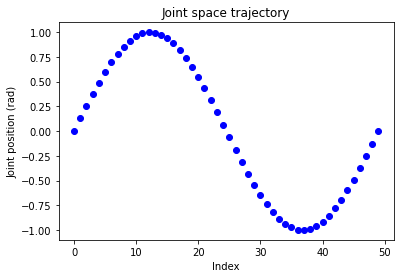

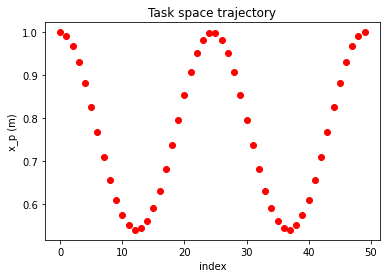

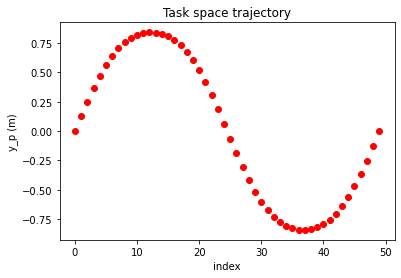

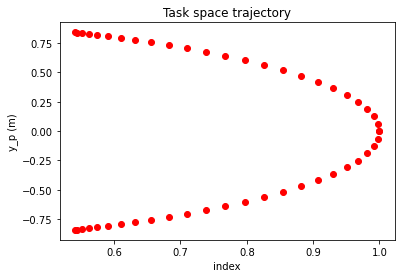

In [5]:
# Number of steps in the trajectory
N = 50

# Define the joint space trajectory 
q = np.sin(np.linspace(0,1,N)*2*np.pi)

# This plots the sequence q_1, ..., q_n
plt.plot(q, 'bo')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")

# Create `GeometricModel1R` object
geom1R = GeometricModel1R(L)

# Animate the sequence of joint positions
geom1R.animate(q)

# Calculate the sequence p_1, ..., p_n 
p = np.zeros((2,N))
for i in range(N):
    p[:,i] = geom1R.DGM(q[i])

# Plot the sequence p_1, ..., p_n 
    # x_p
plt.figure()
plt.plot(p[0,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("x_p (m)")
    # y_p
plt.figure()
plt.plot(p[1,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")
    # p=(x_p,y_p)
plt.figure()
plt.plot(p[0,:], p[1,:], 'ro')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")

# 2R robot

Now you will have to derive the DGM and IGM of the 2R planar robot (2 links, 2 revolute joints) shown below.

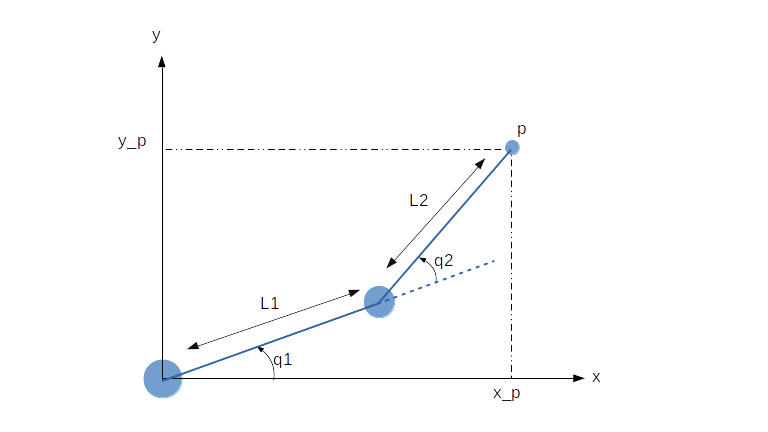

In [6]:
# Display the 1R robot
Image("2dof.png")

__Question__ : derive the DGM of the 2R robot, i.e. express $p=(x_p,y_p)$ in terms of the joint positions $(q_1,q_2)$. What happens in the DGM when $q_1 = q_2 = 0$ ?

Hint: use [projections](https://en.wikipedia.org/wiki/Rotation_of_axes)

__Answer__ : By projecting on $ \vec{x} $ and $\vec{y}$ axes, it can be seen that

$$
x_p = L_1 \cos(q_1) + L_2 \cos(q_1 + q_2) \\
y_p = L_1 \sin(q_1) + L_2 \sin(q_1 + q_2)
$$

To convince yourself of that, the trick is to define a new frame attached to joint $2$ with axes $\vec{x}^*,\vec{y}^*$ such that $\vec{x}^*$ is aligned with the first link. The new frame's origin (say $(x_2,y_2)$) can be expressed ___with respect to the base frame___ as

$$
x_2 = L_1 \cos(q_1) \\
y_2 = L_1 \sin(q_1)
$$

And the end-effector's coordinates with ___respect to the new frame___ are

$$
x_p^* = L_2 \cos(q_2) \\
y_p^* = L_2 \sin(q_2)
$$

We need to express everything w.r.t. the base frame. So let's now express $\vec{x}^*$ with respect to the base frame axes $ \vec{x}, \vec{y} $ :

$$
\vec{x}^* = \cos(q_1) \vec{x} + \sin(q_1) \vec{y}
$$

Similarily, the new axis $\vec{y}^*$ reads

$$
\vec{y}^* = -\sin(q_1) \vec{x} + \cos(q_1) \vec{y}
$$

Injecting these expressions of $\vec{x}^*,\vec{y}^*$ into the expression of $x^*_p, y^*_p$ one obtains the expression of $x_p^*,y_p^*$ in terms of the original base frame's axes $\vec{x},\vec{y}$ :

$$
x_p^* = L_2\cos(q_2) \cos(q_1) - L_2 \sin(q_2)\sin(q_1) = L_2 \cos(q_1 +q_2)\\
y_p^* = L_2\cos(q_2) \sin(q_1) + L_2 \sin(q_2)\cos(q_1) = L_2 \sin(q_1 +q_2)
$$

(using classical trigonometry formulas). ___Since everything is now expressed in the same frame___ (the base frame), we obtain the result by adding up the components :

$$
x_p = x_2 + x_p^* = L_1 \cos(q_1) + L_2 \cos(q_1 + q_2)\\
y_p = y_2 + y_p^* = L_1 \sin(q_1) + L_2 \sin(q_1 + q_2)
$$ 

When $q_1=q_2=0$ we have $x_p = L_1 + L_2$ and $y_p = 0$. 

__Question__ : derive the IGM of the 2R robot. Bonus question: How many solutions $(q_1,q_2)$ are there given some $p$ ? (There are $3$ cases depending on $p$)

Hint: There exist at least $2$ methods
- A geometric one using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html), 
- An algebraic one (play around with the DGM equations)

__Answer__ : Now we need to express $q_1,q_2$ in terms of $x_p,y_p$. There are several solutions:

>__Solution 1 : geometric solution__

Using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html) we have 

$$
x_p^2 + y_p^2 = L_1^2 + L_2^2 - 2L_1 L_2\cos(\pi-q_2)\\
\cos(q_2) = \frac{x_p^2+y_p^2-L_1^2-L_2^2}{2L_1 L_2}
$$

from which we derive $q_2$ using $\cos^{-1}$ and observing that

$$
q_1 = q_1 + q_2 - q_2
$$

where $q_1 + q_2 = \tan^{-1}(\frac{y_p}{x_p})$, we have 

$$
q_1 = \tan^{-1}(\frac{y_p}{x_p}) - q_2
$$

>__Solution 2 : algebraic solution__

Observe that from the DGM equations we have

$$
x_p^2 + y_p^2 = L_1^2 \cos^2(q_1) + L_2^2 \cos^2(q_1 + q_2) + 2 L_1 L_2 \cos(q_1)\cos(q_1+q_2) \\
            + L_1^2 \sin^2(q_1) + L_2^2 \sin^2(q_1 + q_2) + 2 L_1 L_2 \sin(q_1) \sin(q_1 + q_2)
$$

which can, using classic trigonometry formulas, be simplified into 

$$
x_p^2 + y_p^2 = L_1^2 + L_2^2 + 2 L_1 L_2 \cos(q_2)
$$

from which we can deduce $q_2$. The expression of $q_1$ is derived as in the geometric solution. 

__Question__ : How many solutions $q=(q_1,q_2)$ are there given some $p=(x_p,y_p)$ ? 

Hint: There are $3$ cases depending on the value of $p$

__Answer__ :

Note that depending on the value of $p=(x_p,y_p)$, there can be $0$, $1$, or $2$ solutions. For instance
- If $x_p^2 + y_p^2 > L_1^2 + L_2^2$, there is no solution (the arm can't stretch)
- If $x_p^2 + y_p^2 = L_1^2 + L_2^2$, there is a unique solution ($q_2=0$ and $q_1=\tan^{-1}(\frac{y_p}{x_p})$)
- If $x_p^2 + y_p^2 < L_1^2 + L_2^2$, there are two conjugate solutions

__Question__ : Write the GeometricModel2R class (complete the code below)

__Answer__ :

In [7]:
# Class for the geometric model of the 2R robot
class GeometricModel2R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L1=1., L2=1.):
        ''' 
        Initialize model parameters
        '''
        
        self.L1 = L1
        self.L2 = L2
        
    def DGM(self, q):
        '''
        Input : joint positions q=(q1,q2) (in rad)
        Output : end-effector position (in m)
        '''
        q1 = q[0]
        q2 = q[1]
        x_p = self.L1*np.cos(q1) + self.L2*np.cos(q1 + q2)
        y_p = self.L1*np.sin(q1) + self.L2*np.sin(q1 + q2)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint positions q (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q2 = np.arccos( (x_p**2 + y_p**2 - self.L1**2 - self.L2**2) / (2*self.L1*self.L2) )
        q1 = ( np.arctan2(y_p, x_p) - q2 )# % (2*np.pi)
        q = np.array([q1, q2]) # % (2*np.pi)
        return q
        
    def animate(self, q):
        '''
        Simulate the robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L1 -1, self.L1 + 1), ylim=(-self.L2 -1, self.L2 + 1))
        text_str = "2R robot animation"
        link1, = ax.plot([], [], lw=4)
        link2, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link1.set_data([], [])
            link2.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link1, link2, base, endeff
        
        def animate(i):
            p = self.DGM(q[:,i])
            x = p[0] 
            y = p[1] 
            link1.set_data([0,self.L1*np.cos(q[0,i])], [0,self.L1*np.sin(q[0,i])])
            link2.set_data([self.L1*np.cos(q[0,i]),x], [self.L1*np.sin(q[0,i]),y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link1, link2, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[1], interval=25, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))
        
# Create geometry
geom2R = GeometricModel2R()

# Test DGM
q = np.array([np.pi/4, np.pi/4])
p = geom2R.DGM(q)
p = geom2R.DGM(np.array([0.,0.]))
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

# Test IGM
p = np.array([1.9,0.01]) #np.array([1.4, 1.1])
q = geom2R.IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The end-effector position corresponding to q = [0.78539816 0.78539816] is : p = [2. 0.]
The joint position corresponding to p = [1.9  0.01] is : q = [-0.62977347  0.63503658]


__Question__ : Now generate trajectories of your choice in the joint space (for instance you can define sines as for the 1R example, but feel free to try out different trajectories). Plot them as done before, and calculate and plot the corresponding endeffector trajectory.

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABLPm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABPBZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBjgvNA9NyX0pOD8+0aEKaS/
W+kRxFrWNzf+eSO4TQp9X9rSQjTItyhp18FcAAFYwPSb9MNj7345mZM2SCpqc/4dq8TkXuq00M8Q
OvVEaAcaB8dFKy0nxv6lS/KsJVTGkw7kt4VpUBgOXNkT5vbbHpQLGFTaisacVyNWLNCImxrwyoEY
lJx5jyLlf5PD8ImwFKMLmZhi2TEEJtj8GV9R/UBB/NoG1pPsaybMUxhEHsOgEs62wUO93ABvLX+J
guKr6s2LSTTKYqZ2uyU+ivbj9KDweAkr2f6MFX2NcBz4Zq8fYQnNHf1lRK6Qz0VRcx29SzyxxjZW
BgROfxkIr3mcfF10QJSzwmXqXbukSs4qLlxMG+QUVoZ+fBZDXj6sUq5nWR2PfAossU0QP8QysOQm
vbshV9jJbK+WR2NCqnyZmsif1msgleTZXxp/q1rm41dO18wP+2Dvj4kyx08ufBRzcpC9XZ1QLle3
gJX1jL4Uekv/9Vh7sNZPaXiXWrAIJiQI+zaASEQGqt9oJd6utMO19xEYVqElgA2vUhaE9O0T1n2X
wt7m4NcBUfPdu26HwgtaR60WirNr6p3MBugxnqHc0elGg5IgXp6uTukavLbxjDm5zMg9LFYhgjfY
Ok2FOHougUi7xtkYyiBR31y/9EZIBXRP2d/7AJDwcOWjTd97IxkxaGQ2wkrTlE119J+EUenjxjRh
J4kC8MsDKDCwZS/qtnfAMzyZAbFqrfW9wrP/JoDHuoUg6F9TXnq4QNLN/acEFtxMu4RtDGhGlTZM
zhHDxpqKxQy/o3kCAHjLCFaBA6OCsCYcaVnqbWPp0W2GCCYszM0VeDwRaoyErG6WoqirtBXMNXoF
sU56QKHJvK2AMZ5rHL1T9ovW4SJYOdF3JbBKqqSLyshHTtSp4O/m5kHKPC2n9oc/JqHyXUg6BWYa
yqIDODPPmQXfvqSsTJguH/+BIkdDRbd3wVKbcgjaJobdLcHLkcyxzf3k1NcuFa4F4v9E6SIb9Wpf
0ZmQMOgWDgRLfYRqANtRfSWszZDwXMxMpqQLiyARmiambEcBdU37362RsnR0iuysOtaZyd/FYW+6
W7dIp3GS6pJ2Ff39mNGc59NDcsnKx5DRW5uLwSQGk5Q94cM3I79vIGCYkiUASAAkrTPi1q+1h5CR
MRbONlPl5B8gd0SeOGyS6oDRhbtTFnsHzEt7BcjUGKiRxn/BrQAoZ3SEdS6fYbO3D7OOgi1XUaAW
+E1DYBBI7YJz6BozBIIpDIa1jW0ulBUw2+NKmsVeg0HkrYYCjCPrInL7WMTxQwGZe9k613Xh9ahR
ecq+LaGFprd1G3XUIS9yJf7SZcEoVgdJIERm/tQlqF9RUR4G03FlTVtbLLU/lb9aJmC/t49w9Nlt
xwz+++CRx2T7fj3VfaGWvA+oowC6xcHBaX9FhMJPFfvoWL/P00SAjK1gtNiMbrE5DaaAZzKcvf4H
CjoKwlh8wBejKnPMZAkvSPzg2Q6wZvuHimymzI8dtTV/+X2cBRzUIacrgGhn9bpZsy8pDWkXl39E
vpd6yFI3sGsgvJUB8LC5/iV5UDscbBg4EvlDNlWempw0VO4FV1gKZZ25ZyGNBq53+3aN7SgfqZo7
wbB2hYb9jKGeAhWImDWE/G9iH+8j+v3r2vieyfydti8RlRZZ3+I2Bay64bdnfJRMnbeJU3ZQypas
N28SpNN+X86dJDnmWPT3nix37egj3dt8bdqLr+dSGTiKJOm/5WM9rA/m5o/hzbiQKOjWtsIiKgq1
n0t9auzYZR80UY9amU4cf9SN0FWv2kR2vAyl6U0OCGDg0CyV5jtomJm0gDUW8aMIWOx20Cic5IVy
CfwpvNDNrzTYDQBSHPjAbOLO6HG+6EH/7k5PTAGa2z84w/gsiDHEAgbe525dt3pzvPnzIr/mB+gU
RKT345dCbjEyZnkLjqfbgrVTp0epc7P5RgbjAAOhJAeUybTmbQddfkdCFJKF0nMXNyhcjrSFuFnv
qiy7CxlerwXYy81sNr4+g10qbUt81q1Oh05mKwmAfys+0ZrhHrjTb4CW8vpxtF6UipohgnTL2sKo
INlky/ACDjrO3fkKbhtItV2uBZos4mfmY346G0IukMfNBAblqc48AEXOub+a3TToX4p+9kt929/l
mhRPFO4x0fKYM+OVhb6V5BL9RI59GPt3zXe3VnF38UlibsBwTqNdVm+0CV9AAmUPQTw5wR34ICHA
fHlf3F8yy2fv1NIY3l8pHfnPHHpFhbx1/m1xT5F38wtyfASVM9BYk/sZl+Dj3CUY63iEFZH8mvS4
Mdf0pkuBRs7M/c74ZmJ+xDn68d5sk0XZLaimdFR7UhMHOh75gv7CH/5PZ7rUJJvtWo7/S5Qx+De8
J+I2V9BeHWyA+4/AYDNbBvt1qqm/1TSaCeuDxwstBfkfdBV/fmjJ3AOANeSomdqbkSqP1Nsb36n7
UIRuI6CbfDiVWs8pPqnnFAAI1AJSqlhwEZCyjHesaG5hEpT+yA/lBDuMl5K7+hsqAeo6HHJms42g
Cb+czgp1bEmMEG9822WD408pj2APvQLWAOt1HQ3TrCGI9ADSJgc5miBEiAvXN/ijTJ7WcWGH6Bp3
7ec7sSZS8fZZeoWC9xqQb2zyP9YaZxClOflhRhKo9SwrVviiButkL1rBkOhSyzX6gSPIXJGnpZNa
ZgJLlzfarnySt8MIf9olTBJIxRrjTpdodyB6ANPXC71zthy/5aiFnlIr/0v3/trU/pubx7/CT0GU
AnBBW4ZnoGtvwr8s3oWswHMOm9hScEm+fvM2zKaFXtnxz7xSOK4b1YUnR2axUS/HYdXsNC/su6iU
GTWCvINrNEW83i/K/2L/s

Text(0, 0.5, 'y_p (m)')

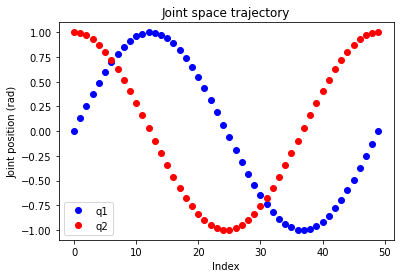

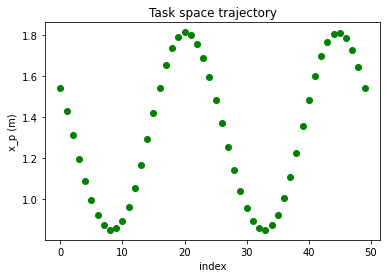

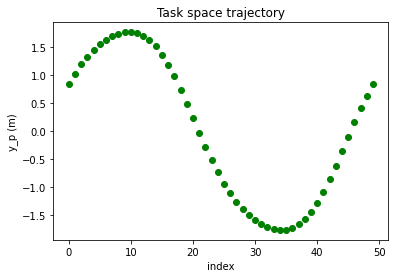

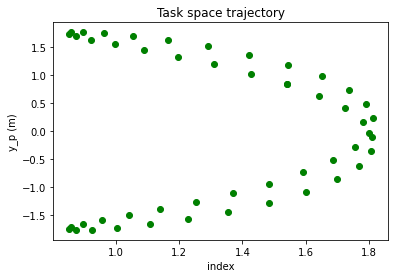

In [8]:
# Number of steps in the trajectory
N = 50

# Define the joint positions sequences
q1 = np.sin(np.linspace(0,1,N)*2*np.pi)
q2 = np.cos(np.linspace(0,1,N)*2*np.pi)
q = np.array([q1, q2])

# This plots the sequence q1_1, ..., q1_n and q2_1, ..., q2_n on the same plot
plt.plot(q1, 'bo', label='q1')
plt.plot(q2, 'ro', label='q2')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")
plt.legend()

# Create `GeometricModel1R` object
L1 = 1.
L2 = 1.
geom2R = GeometricModel2R(L1,L2)

geom2R.animate(q)

# Calculate the sequence p_1, ..., p_n 
p = np.zeros((2,N))
for i in range(N):
    p[:,i] = geom2R.DGM(q[:,i])

# Plot the sequence p_1, ..., p_n 
    # x_p
plt.figure()
plt.plot(p[0,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("x_p (m)")
    # y_p
plt.figure()
plt.plot(p[1,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")
    # p=(x_p,y_p)
plt.figure()
plt.plot(p[0,:], p[1,:], 'go')
plt.title("Task space trajectory")
plt.xlabel("index")
plt.ylabel("y_p (m)")

__Question__ : The other way around, now plot an end-effector trajectory you choose, calculate and plot the corresponding joint trajectories. 

__Answer__ :

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABC1G1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABMuZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBjgvNA9NyX0pOD8+0aEKaS/
W+kRxFrWNzf+eSO4TQp9X9rSQjTItyhp18FcAAFYwPSb9MNj7345mZM2SCpqc/4dq8TkXuq00M8Q
OvVEaAcaB8dFKy0nxv6lS/KsJVTGkw7kt4VpUBgOXNkT5vbbHpQLGFTaisacVyNWLNCImxrwyoEY
lJx5jyLlf5PD8ImwFKMLmZhi2TEEJtj8GV9R/UBB/NoG1pPsaybMUxhEHsOgEs62wUO93ABvLX+J
guKr6s2LSTTKYqZ2uyU+ivbj9KDweAkr2f6MFX2NcBz4Zq8fYQnNHf1lRK6Qz0VRcx29SzyxxjZW
BgROfxkIr3mcfF10QJSzwmXqXbukSs4qLlxMG+QUVoZ+fBZDXj6sUq5nWR2PfAossU0QP8QysOQm
vbshV9jJbK+WR2NCqnyZmsif1msgleTZXxp/q1rm41dO18wP+2Dvj4kyx08ufBRzcpC9XZ1QLle3
gJX1jL4Uekv/9WZfLQ58T+1+4J8CCVkh9nUAkIgBaBMJIlI9awAbXqVQk9O0XF2eqHt7m4NcBUfP
du26Hyz0Cf3otFS1X1TuYDdBjPUO5o9KNByRAvT1cndI1eW3jGHNzmZB6WKxDBG+wdJsKcPRdApF
3jbIxlECjvrl/5S4gFdE/Z3/sAkPBw5aNN33sjGTFoZDbCUNOUTXX0n4RR6ePGNGEniQLwywMoML
BlL+q2d8AzPJkBsWqt9b3Cs/8mgMe6hSDoX1NeerhA0s39pwQW3Ey7hG0MaEaVNkzOEcPGsorFDL
+jeQIAeMsIVoEDo4KwJhxpWeptY+nRbYYIJizMzRV4PBFqjISsbpaiqKu0Fcw1egWxTnpAocm8rY
AxnmscvVP2i9bhIlg50XQRwCqqpIvKyEdO1Kng7+bmQco8Laf2hz8mofJdSDoFZhrKogM4M8+ZBd
++pKxMmC4f/4EiR0NFt3fBUptyCNomht0twcuRzLHN/eTU1y4VrgXi/0TpIhv1al/RmZAw6BYOBE
t9hWtnMKmaTwFuEwn+ENFgakC4sgEZompmxHAXVN+9+tkbJ0dIrsrDrWmcnfxWFvulu3SKdxkuqS
dhX9/ZjRnOfTQ3LJyseQ0Vubi8EkBpOUPeHDNyO/byBgmJIlAEgAJK0z4tavtYeQkWFV0aD1eLr2
r0VMtRw2SXVAaMLdqYs9g+YlvYLkagxUSOM/4NaAFDO6QjqXT7DZ24fZx0EWq6jQC3wmobAIJHbB
OfQNGYJBFIZDWsa2l0oKmG3xpU1ir0Dg8lbDAUYR9ZE5faxieKGAzL3snWu68PrUKLzlXxbQwtNb
uo266hCXuRL/aTLglCsDpJAiM39qEtQvqKiPA2m4sqatrZZan8rfrRMwX9vHuHpstuOGf33wSOOy
fb8e6sBTxAc0XtUHnL97yvFE7rU8QIR+R4Bf5+miQEZWsFpsRjdYnIbTQDOZTl7/A4UdBWEsPmAL
0ZU55jIEl6R+cGyHWDN9w8U2U2ZHjtqav/y+zgKOahDTlcA0M/rdLNmXlIa0i8u/ol9LvWQpG9g1
kF5KgPhYXP8SvKgdjjYMHAl8oZsqz01OGip3AqusBTLO3LOQxoNXO/27RvaUD9TNHeDYO0LDfsZQ
zwEKxEwawn43sQ/3kf1+9e18T2T+SDwXiMqLLO/xGwLWXXDbs75KJk7bxKm7KGVLVhu3iVJpvy/n
TpIc8yx6e88WO/b0Ee7tvjbtRdfzqQycRRJ03/KxntYH83NH8ObcSBR0a1thERUFWs+lvrhCkJZZ
HxBBWJG7hx/1I3QVa/aRHa8DKXpTQ4IYODQLJXmO2iYmbSANRbxowhY7HbQKJzkhXIJ/Cm80M2zC
RCSAJrOS0UKdFc1y9CW7/7k5PTAGqb0bAEszFR0DAtHVgywozUUvJ57YZZ3J/7XKfeG6OnVcf8Qc
L8uSH+Liik/3PK7d8xXP3GLd7nf24Jg5Gh25GhnTYyHuFSmskdyMm4fnMAcq+kLcLdv2Ln3I2j9X
dvNGsMYAu+UbRpJUVhNZrjLyMpztyOSEXN5mgJ4q+/FnGRKf/FJSmtJrSWbW5AB5YAZRftr+QoJo
O9u+XZuPr6oSFaBnh78br5kZRgXh/G+JQflzAqyIqLbNeipwRc7jsf5V97nigTtv5JKUX6I+w/La
dM9KLgswZ8crC30ryQPbdjMqMfbvrF9uk4v58UlibxZrjqNdUrdhyvgZIDB9BA+26TpcA7+FgAaF
dvPxV/gmQf/ZnX67GtwIxaK+vjr/NmJL5tJQxW+WXT7iDKmMvKcnc4Rzd60JSLuv4wLMm0uxit9T
OT0Wi56r2lAVqhZ1pUqowy2LslvJWTi8AeYZScctjb/T8f9/2uX6CnJ143k90IPzR54JFxNFmRSD
3uqFqufJM/urvh+wXr2dbvbD/VL0i7MI/nHuvSrsguDUE6A5YqNKgAkHiR38+qGWEMR6AGkTA5zN
ECJEBeub/FGmT2s4sMP0DTv2853Ykyl4+yy9QsF7jUg3tnkf6w0ziFKc/LCjCVR6lhWrfFEDdbIX
rWDIdCllmv1AkeQuSNPxz2gO2f4+mZNlwHPVgBm+B6IUI9Ww2AWhF2cuJyv2nfddA+fh3dWoR/xv
r2VmiR/XR0BbXzuPwclRABhAq/CcaQTpnISDau9Ox8VK97x33fQfseZ+dpdH/X6DIOOyFv+czpmx
6Hi7PEji9K4jIfPJ4+nRek6K+eeTm4/4tCFkf1c5i74Ub1WeUANHiSTEpLrt5m7BbGWNuKuum2aJ
WConq1Y5CR1xjivfSY8gQcPmYh/MlhmdPEvYcHCH0+NtSCOChGEadzlgxeedOVl4u7uNTcM+fILe
y4OQo7Xqhv2nUAFQ0xwBi

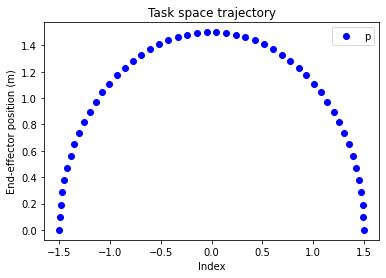

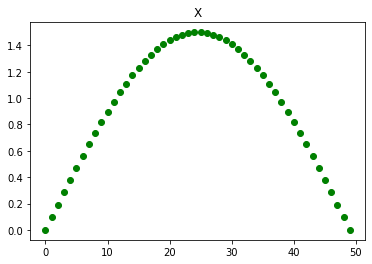

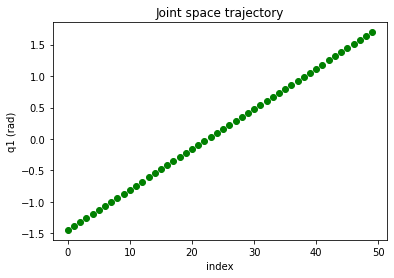

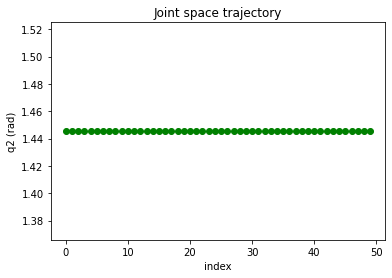

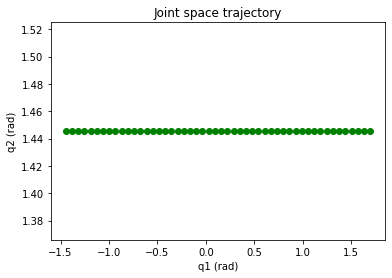

In [9]:
# Number of steps in the trajectory
N = 50

# Define a half circle of radius r in task space
r = 1.5
t = np.linspace(0,1,N)
x_p = r*np.cos(t*np.pi)
y_p = r*np.sin(t*np.pi)
p = np.array([x_p, y_p])

# This plot task space sequence p1,...,pn
plt.plot(x_p, y_p, 'bo', label='p')
plt.title("Task space trajectory")
plt.xlabel("Index")
plt.ylabel("End-effector position (m)")
plt.legend()

plt.figure()
plt.plot(p[1,:], 'go')
plt.title("X")

# Create `GeometricModel1R` object
L1 = 1.
L2 = 1.
geom2R = GeometricModel2R(L1,L2)

# Calculate the sequence q_1, ..., q_n 
q = np.zeros((2,N))
for i in range(N):
    q[:,i] = geom2R.IGM(p[:,i])

# Plot the sequence of q's 
    # q1
plt.figure()
plt.plot(q[0,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("index")
plt.ylabel("q1 (rad)")
    # q2
plt.figure()
plt.plot(q[1,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("index")
plt.ylabel("q2 (rad)")
    # q=(q1,q2)
plt.figure()
plt.plot(q[0,:], q[1,:], 'go')
plt.title("Joint space trajectory")
plt.xlabel("q1 (rad)")
plt.ylabel("q2 (rad)")

# Animate 
geom2R.animate(q)

In this notebook we've introduced the concepts of joint space and task space. We derived and implemented the geometric model of the 1R and 2R robots. This description is "static", in a sense that it doesn't take into account velocities. The next notebook introduces the kinematic model, which relates velocities in the joint space to end-effector velocities in the task space.